In [2]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from sklearn.preprocessing import LabelEncoder
import warnings

In [4]:
path = "C:\\Users\\Paulo\\Desktop\\MBA DATASCIENCE\\Linear Regression\\insurance.csv"
df = pd.read_csv(path)


# lets look into top 5 rows of the dataset
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Transformar variáveis categóricas em numéricas
df_encoded = pd.get_dummies(df, drop_first=True)

display(df_encoded.head())


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [7]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separar treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficientes e intercepto
print("Intercepto (b):", modelo.intercept_)
print("Coeficientes (a):", modelo.coef_)


Intercepto (b): -11931.219050326688
Coeficientes (a): [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]


In [9]:
y_pred = modelo.predict(X_test)

# Comparar real vs previsto
resultado = pd.DataFrame({"Real": y_test, "Previsto": y_pred})
print(resultado.head())


             Real      Previsto
764    9095.06825   8969.550274
887    5272.17580   7068.747443
890   29330.98315  36858.410912
1293   9301.89355   9454.678501
259   33750.29180  26973.173457


In [10]:
import numpy as np

# Criar dataframe com as mesmas colunas do X
nova_pessoa = pd.DataFrame({
    "age": [35],
    "bmi": [28.5],
    "children": [2],
    "sex_male": [1],            # 1 = male, 0 = female
    "smoker_yes": [0],          # 1 = smoker, 0 = non-smoker
    "region_northwest": [0],
    "region_southeast": [1],
    "region_southwest": [0]
})

# Fazer a previsão
valor_previsto = modelo.predict(nova_pessoa)
print(f"Valor previsto de charges: R${valor_previsto[0]:.2f}")


Valor previsto de charges: R$6844.17


In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# R²
r2 = r2_score(y_test, y_pred)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R²: 0.7836
MAE: 4181.19
RMSE: 5796.28


In [15]:
%pip install statsmodels



     ---------------------------------------- 9.7/9.7 MB 13.7 MB/s eta 0:00:00
     ------------------------------------- 232.9/232.9 kB 14.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Paulo\AppData\Local\Temp\ipykernel_6960\3263688066.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas = pd.date_range(start="2020-01", periods=36, freq="M")
c:\Users\Paulo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Paulo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Paulo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate sta

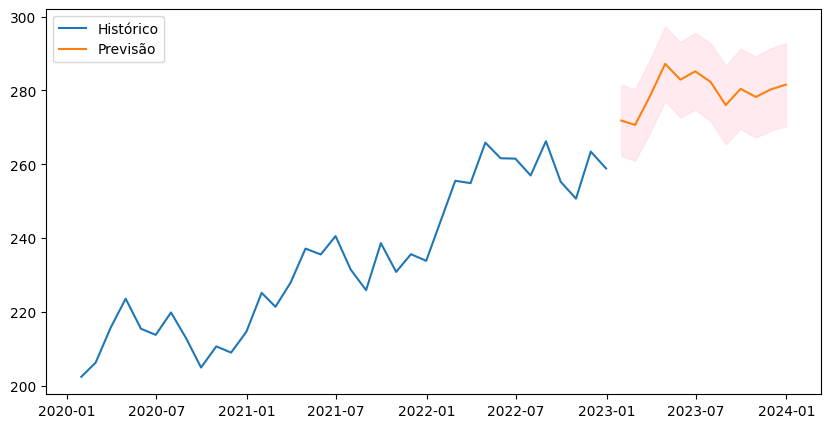

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Criar dados mensais fictícios (3 anos)
np.random.seed(42)
datas = pd.date_range(start="2020-01", periods=36, freq="M")
vendas = 200 + np.arange(36) * 2 + 10 * np.sin(np.arange(36) * 2 * np.pi / 12) + np.random.normal(0, 5, 36)

df = pd.DataFrame({"Data": datas, "Vendas": vendas})
df.set_index("Data", inplace=True)

# Modelo SARIMA: (p,d,q)(P,D,Q,s)
modelo = SARIMAX(df["Vendas"], order=(1,1,1), seasonal_order=(1,1,1,12))
resultado = modelo.fit()

# Previsão para 12 meses à frente
forecast = resultado.get_forecast(steps=12)
df_forecast = forecast.predicted_mean
df_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Vendas"], label="Histórico")
plt.plot(df_forecast.index, df_forecast, label="Previsão")
plt.fill_between(df_ci.index, df_ci.iloc[:,0], df_ci.iloc[:,1], color="pink", alpha=0.3)
plt.legend()
plt.show()
